In [1]:
input_dim = 12
model_file = "Model/model.cpkt"
num_clusters = 5

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pandas as pd
import scipy
import tensorflow as tf

from base import load_encoder, load_data

import sys
sys.path.insert(0, "../Code/")
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x, y = load_data()

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


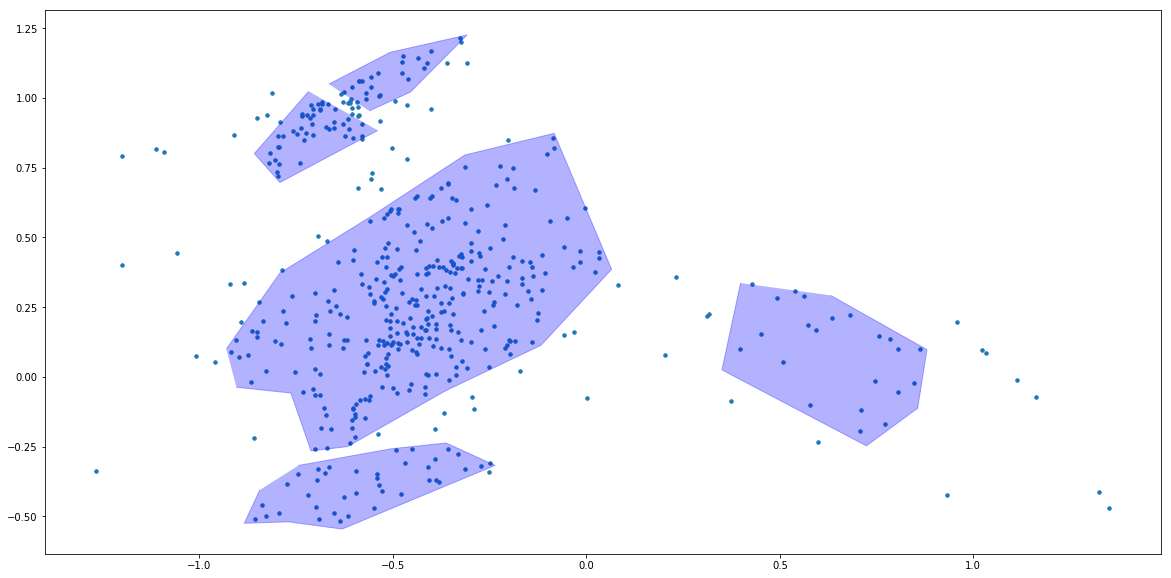

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

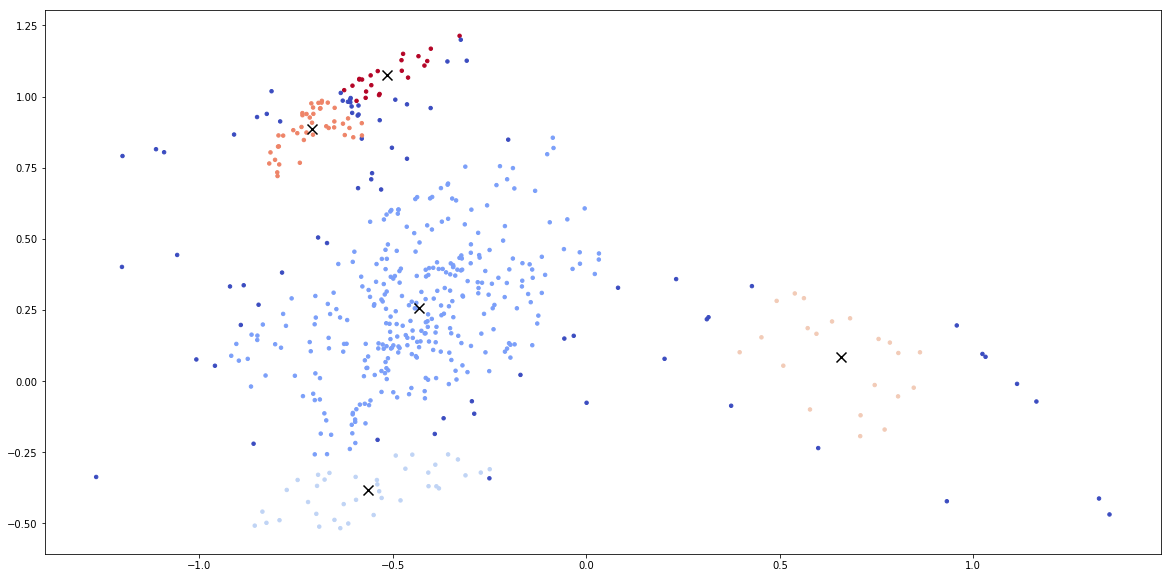

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [10]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas = explain(load_model, x, data_rep, indices, dispersion = 0.2, lambda_global = 0.75, num_points = 10, learning_rate = 0.01)

INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 2.318211
1 2.1130093544721604
3 1.931702084749937
4 1.8061811990231276
9 1.722323481471119
10 1.5804033704675235
11 1.4559550727674662
12 1.3939584772529572
13 1.3578913582035037
15 1.3261174787939776
20 1.3142109399013453
22 1.2607409486003631
25 1.25589372953927
26 1.244728585253556
27 1.2117350758645529
29 1.1912076045912712
31 1.1864993249945035
32 1.124124742350476
37 1.0416956406433546
38 0.9624392981766907
39 0.918605112621717
40 0.8685922058727136
41 0.8427187114035299
42 0.7972602524526606
43 0.7691190491468629
44 0.7261949912027348
45 0.6937583656891432
46 0.6535355632112246
50 0.6516774209837
51 0.615706388279785
52 0.6038167871162199
53 0.5884204742722127
55 0.58711858275573
56 0.5512214483294536
59 0.533587923079162
118 0.5239086970204424
119 0.5108446917993705
121 0.48163606117873725
122 0.4791989927653313
144 0.47710605879875767
145 0.4626834102295585
208 0.44666808915518064
222 0.4411594999242873
306 0.4397958


From  0  to  1 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


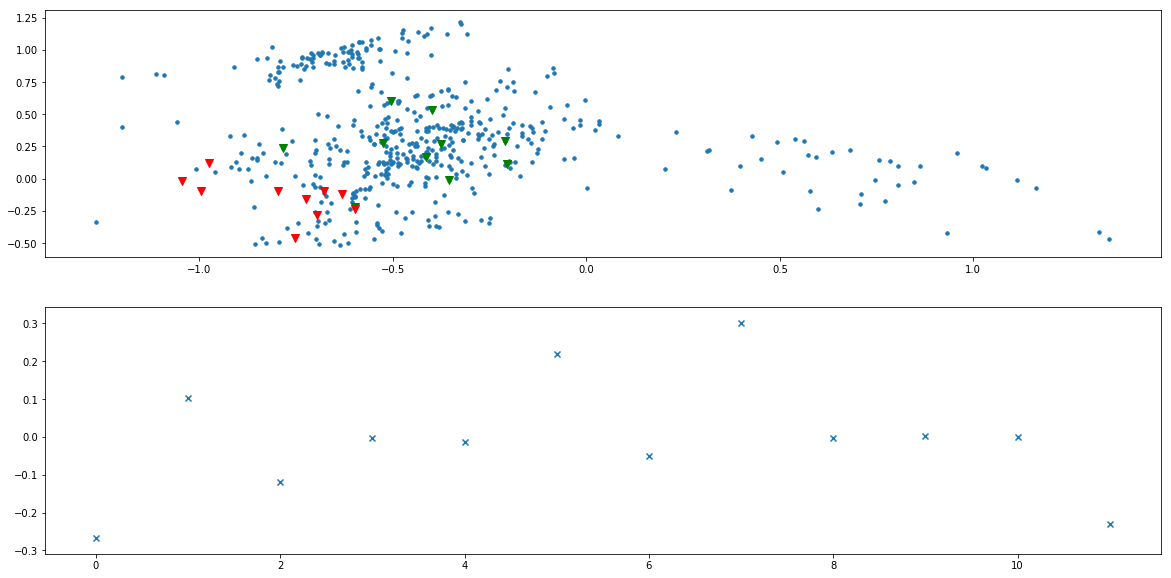


From  1  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


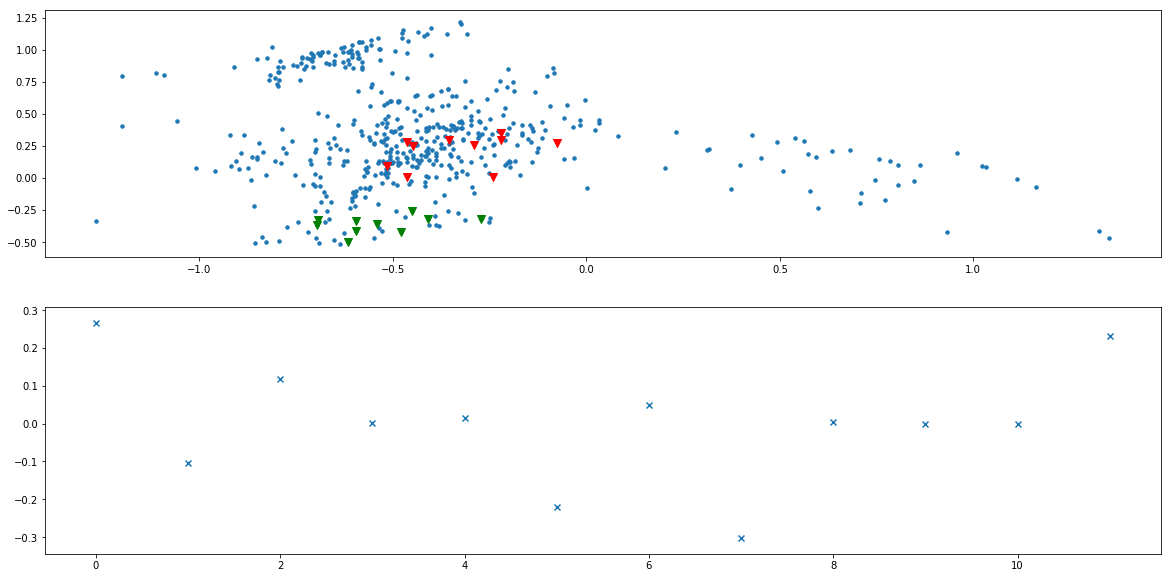


From  0  to  2 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


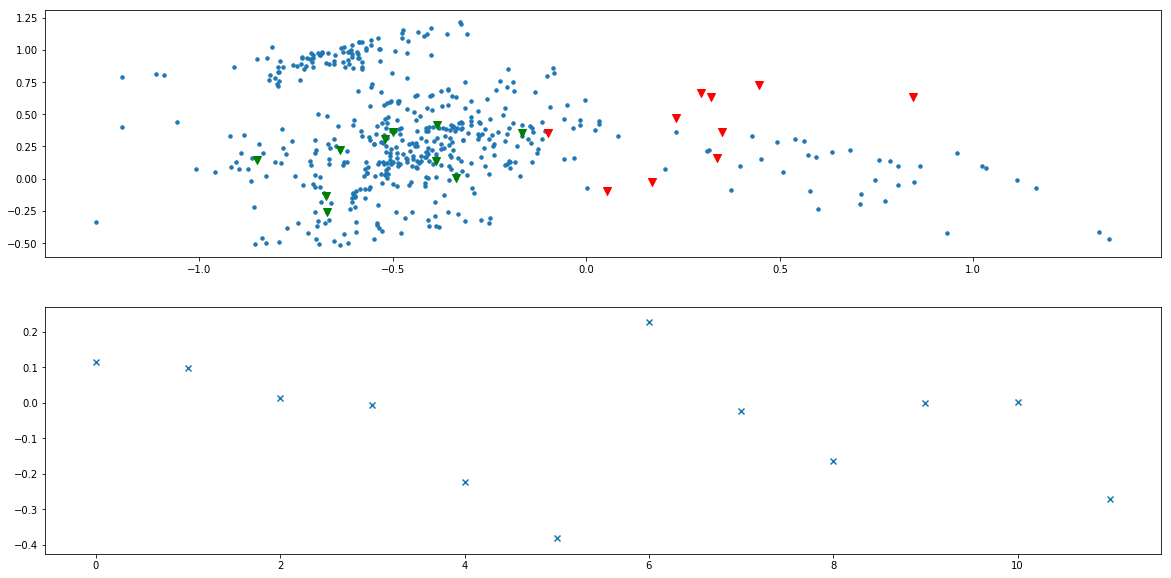


From  2  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


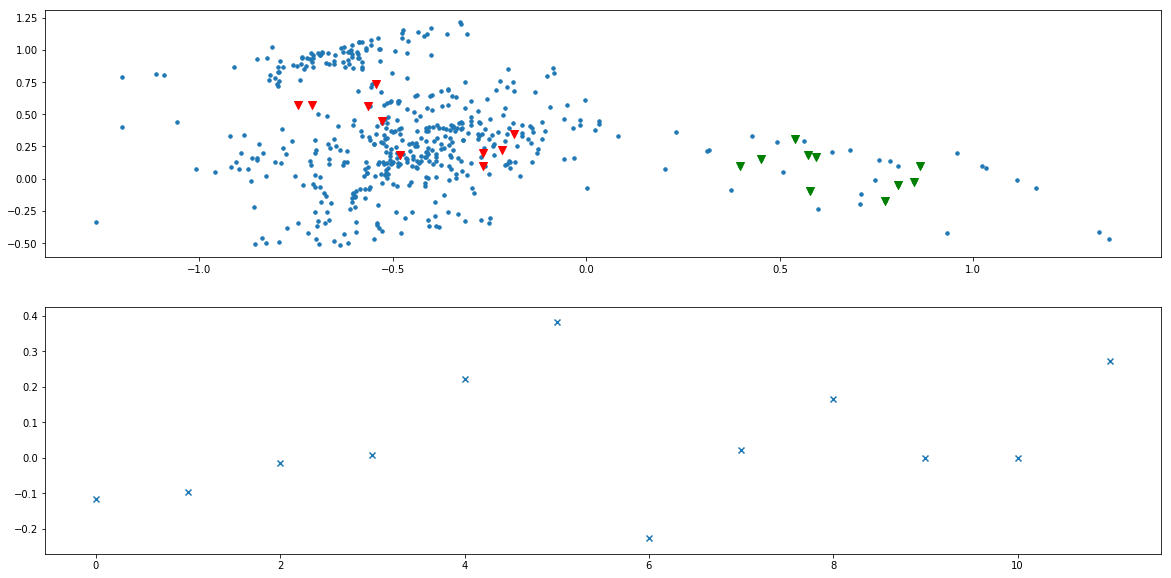


From  3  to  4 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


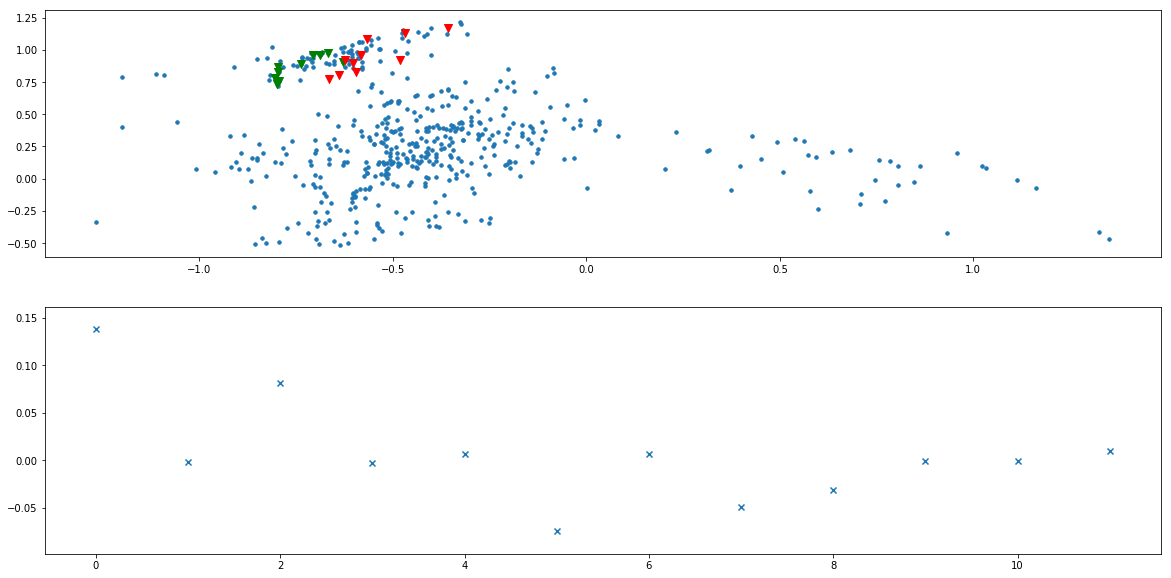


From  4  to  3 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


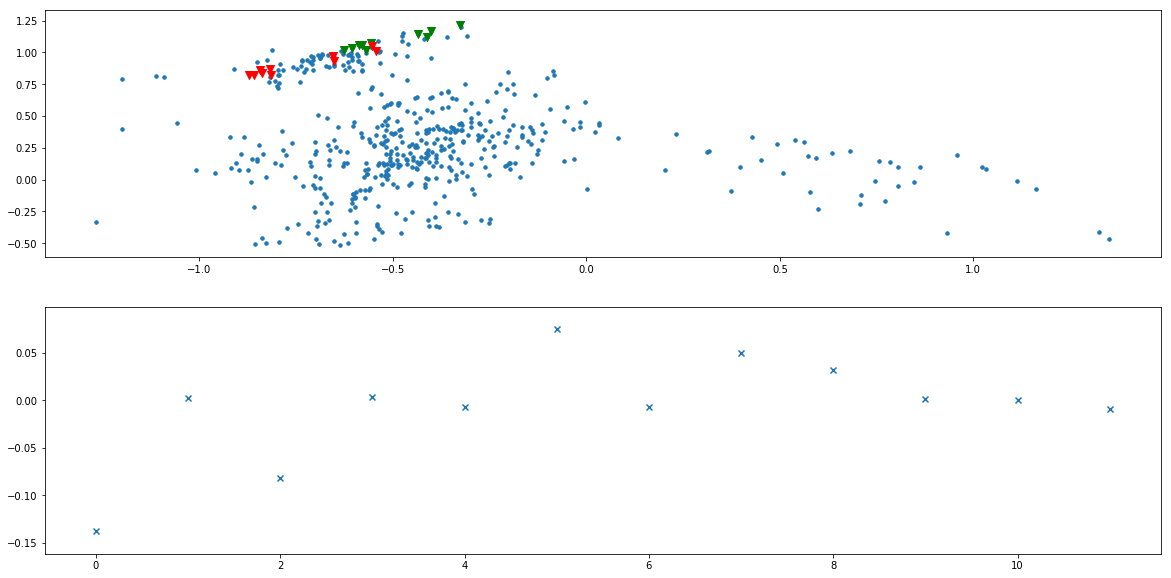

In [11]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
myplot(0, 2)
myplot(2, 0)

myplot(3, 4)
myplot(4, 3)
